In [1]:
# reload magics
%load_ext autoreload
%autoreload 2

In [2]:
import colorcet as cc
import logging
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy



# create a palette dictionary that has the same keys as the original palette
palette = cc.glasbey_hv
palette_dict = {i: mc.to_hex(palette[i]) for i in range(len(palette))} # type: ignore

# add an entry for -1
palette_dict[-1] = '#ffffff'

# set default colour for seaborn heatmaps
sns.set_theme(style = "whitegrid", rc={'figure.figsize':(8,8)}, palette='viridis')


## LOAD DATA

In [3]:
import datasets

In [4]:
ds = datasets.load_from_disk('../Data/DataV1/features.arrow')
df = datasets.arrow_dataset.Dataset.to_pandas(ds)

In [5]:
df

,sex,age,dag,MED-Analgesics,MED-Anesthetics,MED-Antibacterials,MED-Anticonvulsants,MED-Antidepressants,MED-Antifungals,MED-Antimigraine-agents,...,CD-ventricular_tachycardia_or___2,CD-ventricular_tachycardia_or___3,CD-ventricular_tachycardia_or___4,CD-weight_kgs,SUBST-1,SUBST-2,SUBST-3,SUBST-4,SUBST-5,LC_STATUS
0,2.0,30.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,LC_POS
1,1.0,33.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,79.0,0.0,0.0,NaN,0.0,0.0,LC_POS
2,2.0,36.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,55.0,0.0,0.0,NaN,0.0,0.0,LC_POS
3,2.0,50.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,67.0,1.0,0.0,NaN,0.0,0.0,LC_POS
4,1.0,40.0,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,136.0,0.0,0.0,NaN,0.0,0.0,LC_POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,1.0,27.0,5,0,0,0,0,0,0,0,...,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,HC
5798,1.0,25.0,1,1,0,0,0,1,0,0,...,NaN,NaN,NaN,95.0,0.0,0.0,0.0,1.0,0.0,LC_POS
5799,2.0,44.0,1,0,0,0,0,1,0,0,...,NaN,NaN,NaN,82.0,0.0,0.0,0.0,0.0,0.0,LC_POS
5800,2.0,51.0,1,1,0,0,0,0,0,0,...,NaN,NaN,NaN,72.0,0.0,0.0,0.0,0.0,0.0,LC_POS


In [6]:
site_name_dict = {
                  1: 'LDN',
                  2: 'MTL',
                  3: 'SAN',
                  4: 'RIO',
                  5: 'LUS',
                }

# Cleanup

In [7]:
df = df.drop(["SUBST-2", "SUBST-3", "SUBST-4"],axis=1)

In [8]:
cols = df.columns.to_list()

In [9]:
lMeds = [x for x in cols if 'MED-' in x]

In [10]:
lSYMPT = [x for x in cols if 'SYMPT-' in x]

In [11]:
lVAX = [x for x in cols if 'VAX-' in x]

In [12]:
lHHX = [x for x in cols if 'HHX-' in x and 'HHX-OTHER' not in x]

In [13]:
lHHXOther = [x for x in cols if  'HHX-OTHER' in x]

In [14]:
lLABS = [x for x in cols if  'LABS-' in x]

In [15]:
lCD = [x for x in cols if  'CD-' in x]

In [16]:
lSUBST = [x for x in cols if  'SUBST-' in x]

In [17]:
print(df.columns.to_list())

['sex', 'age', 'dag', 'MED-Analgesics', 'MED-Anesthetics', 'MED-Antibacterials', 'MED-Anticonvulsants', 'MED-Antidepressants\xa0', 'MED-Antifungals', 'MED-Antimigraine-agents', 'MED-Antiparasitics', 'MED-Antiparkinson-agents', 'MED-Antipsychotics', 'MED-Antispasticity-agents', 'MED-Antivirals', 'MED-Blood-glucose-regulators', 'MED-Blood-products', 'MED-Cardiovascular-agents', 'MED-Dermatological-agents', 'MED-Gastrointestinal-agents', 'MED-Hormonal-agents-(adrenal)', 'MED-Hormonal-agents-(sex-hormones)', 'MED-Hormonal-agents-(thyroid)', 'MED-Hormone-suppressant-(thyroid)', 'MED-Immunological-agents', 'MED-Inflammatory-bowel-disease-agents', 'MED-Metabolic-bone-disease-agents', 'MED-Ophthalmic-agents', 'MED-Respiratory-tract-agents', 'MED-Skeletal-muscle-relaxants', 'SYMPT-abdominal_pain___1', 'SYMPT-abdominal_pain___2', 'SYMPT-chest_pain___1', 'SYMPT-chest_pain___2', 'SYMPT-confusion_altered_mental_s___1', 'SYMPT-confusion_altered_mental_s___2', 'SYMPT-cough___1', 'SYMPT-cough___2', 'S

In [18]:
df = df.drop(lLABS,axis=1)

In [19]:
dfNA = df[df['dag']<=3] # NORTH AMERICAN SITES - LDN, MTL, SAN

## Drop Cols based on greater than 10% missing

In [20]:
threshold = len(df) * 0.90  # 90% threshold
df.dropna(thresh=threshold, axis=1).dropna()


,sex,age,dag,MED-Analgesics,MED-Anesthetics,MED-Antibacterials,MED-Anticonvulsants,MED-Antidepressants,MED-Antifungals,MED-Antimigraine-agents,...,HHX-OTHER-resp,HHX-OTHER-sickle-cell-anemia,HHX-OTHER-surgery,HHX-OTHER-ulcerative-colitis,HHX-Obesity,HHX-Other,HHX-Pregnant,SUBST-1,SUBST-5,LC_STATUS
0,2.0,30.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,LC_POS
1,1.0,33.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,LC_POS
2,2.0,36.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,LC_POS
3,2.0,50.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,LC_POS
4,1.0,40.0,2,0,0,0,0,0,0,0,...,0,0,0,0,1.0,1.0,0.0,0.0,0.0,LC_POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,1.0,27.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,HC
5798,1.0,25.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,LC_POS
5799,2.0,44.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,LC_POS
5800,2.0,51.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,LC_POS


# 1 - Only Complete Patients -- Cant do - no patients with complete data

In [21]:
df.dropna()

,sex,age,dag,MED-Analgesics,MED-Anesthetics,MED-Antibacterials,MED-Anticonvulsants,MED-Antidepressants,MED-Antifungals,MED-Antimigraine-agents,...,CD-ventilatory_support_type___3,CD-ventilatory_support_type___4,CD-ventricular_tachycardia_or___1,CD-ventricular_tachycardia_or___2,CD-ventricular_tachycardia_or___3,CD-ventricular_tachycardia_or___4,CD-weight_kgs,SUBST-1,SUBST-5,LC_STATUS


# 2 - Drop columns based on treshold complete, keep patients with complete data

In [22]:
def add_suffix_to_dict_keys(dictionary, suffix):
    new_dict = {}
    for key, value in dictionary.items():
        new_key = key + suffix
        new_dict[new_key] = value
    return new_dict

### Tmp - SAMPLE

In [23]:
threshold = len(df) * 0.90  # 90% threshold
df.dropna(thresh=threshold, axis=1).dropna()

,sex,age,dag,MED-Analgesics,MED-Anesthetics,MED-Antibacterials,MED-Anticonvulsants,MED-Antidepressants,MED-Antifungals,MED-Antimigraine-agents,...,HHX-OTHER-resp,HHX-OTHER-sickle-cell-anemia,HHX-OTHER-surgery,HHX-OTHER-ulcerative-colitis,HHX-Obesity,HHX-Other,HHX-Pregnant,SUBST-1,SUBST-5,LC_STATUS
0,2.0,30.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,LC_POS
1,1.0,33.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,LC_POS
2,2.0,36.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,LC_POS
3,2.0,50.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,LC_POS
4,1.0,40.0,2,0,0,0,0,0,0,0,...,0,0,0,0,1.0,1.0,0.0,0.0,0.0,LC_POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,1.0,27.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,HC
5798,1.0,25.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,LC_POS
5799,2.0,44.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,LC_POS
5800,2.0,51.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,LC_POS


## Check all column thresholds for ALL Sites

In [24]:
lThres = []
lLastCols = df.columns.to_list()
for i in range(0, 101, 1):
    threshold = len(df) * (i / 100)
    dfTmp = df.dropna(thresh=threshold, axis=1).dropna()
    
    dThres = {
        "threshold": i,
        "nCols": len(dfTmp.columns),
        "nPatients": len(dfTmp),
        'colDropped': ','.join(list(set(lLastCols).difference(set(dfTmp.columns.to_list())))),
        'cols': ','.join(dfTmp.columns.to_list())
    }
    lLastCols=dfTmp.columns.to_list()
    dThres.update(dfTmp["LC_STATUS"].value_counts().to_dict())
    dThres.update(
        add_suffix_to_dict_keys(
            (
                dfTmp["LC_STATUS"].value_counts()
                / df["LC_STATUS"].value_counts()
                * 100
            ).to_dict(),
            "_Perc",
        )
    )
    lThres.append(dThres)
dfThres = pd.DataFrame(lThres)

In [25]:
dfThres

,threshold,nCols,nPatients,colDropped,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LC_NEG,LC_POS,HC
0,0,388,0,,"sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",NaN,NaN,NaN,NaN,NaN,NaN
1,1,383,0,"CD-oxygen,CD-avpu,CD-baby_covid,CD-outcome,CD-...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",NaN,NaN,NaN,NaN,NaN,NaN
2,2,383,0,,"sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",NaN,NaN,NaN,NaN,NaN,NaN
3,3,382,0,CD-gcs,"sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",NaN,NaN,NaN,NaN,NaN,NaN
4,4,381,0,CD-covid_test_result_4,"sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
96,96,88,5526,,"sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",100.0,94.294479,96.342950,3074.0,2371.0,81.0
97,97,74,5647,"SUBST-5,SYMPT-extremity_weakness_or_numb___1,S...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",100.0,98.006135,96.342950,3195.0,2371.0,81.0
98,98,74,5647,,"sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",100.0,98.006135,96.342950,3195.0,2371.0,81.0
99,99,63,5656,"HHX-Arterial Hypertension,HHX-Obesity,HHX-Chro...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",100.0,98.036810,96.668021,3196.0,2379.0,81.0


In [26]:
dfThres.to_csv('OUTPUT/MP/02-splicing/2_1-thresholdsAll.csv',index=False)

### Plot

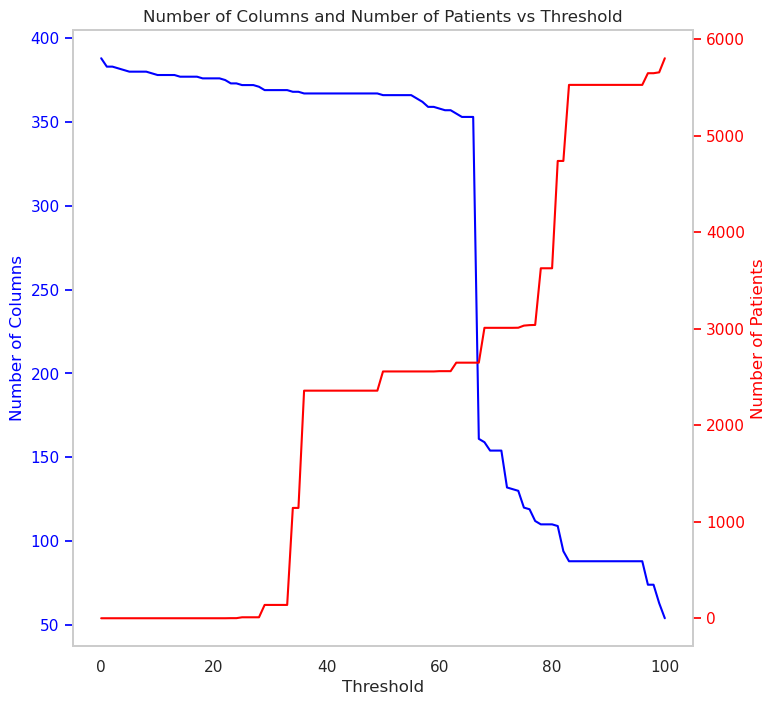

In [27]:
import matplotlib.pyplot as plt

# Extract the data for plotting
x = dfThres['threshold']
y1 = dfThres['nCols']
y2 = dfThres['nPatients']


# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Number of Columns', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second line plot
ax2.plot(x, y2, color='red')
ax2.set_ylabel('Number of Patients', color='red')
ax2.tick_params('y', colors='red')

ax1.grid(False)
ax2.grid(False)
# Add a title and legend
plt.title('Number of Columns and Number of Patients vs Threshold')
# plt.legend(['Number of Columns', 'Number of Patients'])

# Display the plot
plt.savefig('OUTPUT/MP/02-splicing/2_1-thresholdsAll.png',dpi=600)
plt.show()

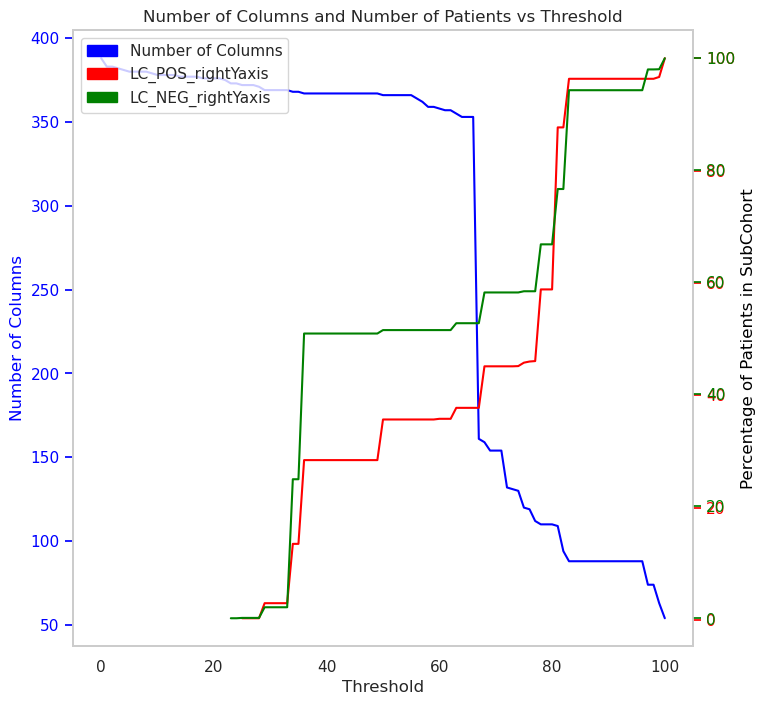

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Extract the data for plotting
x = dfThres['threshold']
y1 = dfThres['nCols']
y2 = dfThres['LC_POS_Perc']
y3 = dfThres['LC_NEG_Perc']

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(x, y1, color='blue',label='num of col')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Number of Columns', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second line plot
ax2.plot(x, y2, color="red", label="LC_POS_rightYaxis")
ax2.set_ylabel('Percentage of Patients in SubCohort', color='black')
ax2.tick_params('y', colors='red')

# Create a third y-axis
ax3 = ax1.twinx()

# Plot the third line plot
ax3.plot(x, y3, color="green", label='LC_NEG_rightYaxis')
ax3.tick_params("y", colors="green")

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
# Add a title and legend
plt.title('Number of Columns and Number of Patients vs Threshold')

# Create a custom legend
blue_patch = mpatches.Patch(color='blue', label='Number of Columns')
red_patch = mpatches.Patch(color='red', label='LC_POS_rightYaxis')
green_patch = mpatches.Patch(color='green', label='LC_NEG_rightYaxis')
plt.legend(handles=[blue_patch, red_patch, green_patch])

# Display the plot
plt.savefig('OUTPUT/MP/02-splicing/2_1-thresholdsAll_subcohort.png',dpi=600)
plt.show()

## Check all column thresholds for NORTH AMERICAN Sites

In [43]:
lThresNA = []
lLastCols = df.columns.to_list()
for i in range(0,101,1):
    threshold = len(dfNA)* (i/100)
    dfTmp = dfNA.dropna(thresh=threshold, axis=1).dropna()

    dThres = {
        "threshold": i,
        "nCols": len(dfTmp.columns),
        "nPatients": len(dfTmp),
        "colDroppedFromPrev": ",".join(
            list(set(lLastCols).difference(set(dfTmp.columns.to_list())))
        ),
        "cols": ",".join(dfTmp.columns.to_list()),
    }
    dThres.update(dfTmp["LC_STATUS"].value_counts().to_dict())
    dThres.update(
        add_suffix_to_dict_keys((dfTmp["LC_STATUS"].value_counts() / dfNA["LC_STATUS"].value_counts() * 100).to_dict(), '_Perc')
    )
    lThresNA.append(dThres)
dfThresNA = pd.DataFrame(lThresNA)

In [44]:
dfThresNA

,threshold,nCols,nPatients,colDroppedFromPrev,cols,HC_Perc,LC_NEG_Perc,LC_POS_Perc,LC_POS,LC_NEG,HC
0,0,388,0,,"sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",NaN,NaN,NaN,NaN,NaN,NaN
1,1,382,0,"CD-gcs,CD-oxygen,CD-avpu,CD-baby_covid,CD-outc...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",NaN,NaN,NaN,NaN,NaN,NaN
2,2,382,0,"CD-gcs,CD-oxygen,CD-avpu,CD-baby_covid,CD-outc...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",NaN,NaN,NaN,NaN,NaN,NaN
3,3,381,0,"CD-gcs,CD-oxygen,CD-o2_saturation,CD-avpu,CD-b...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",NaN,NaN,NaN,NaN,NaN,NaN
4,4,381,0,"CD-gcs,CD-oxygen,CD-o2_saturation,CD-avpu,CD-b...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
96,96,143,3450,"CD-ventilatory_support_type___4,CD-postpartum,...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",100.0,99.777382,93.774940,1175.0,2241.0,34.0
97,97,143,3450,"CD-ventilatory_support_type___4,CD-postpartum,...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",100.0,99.777382,93.774940,1175.0,2241.0,34.0
98,98,69,3451,"CD-ventilatory_support_type___4,CD-postpartum,...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",100.0,99.777382,93.854749,1176.0,2241.0,34.0
99,99,61,3477,"CD-ventilatory_support_type___4,CD-postpartum,...","sex,age,dag,MED-Analgesics,MED-Anesthetics,MED...",100.0,99.821906,95.849960,1201.0,2242.0,34.0


In [45]:
dfThres.to_csv('OUTPUT/MP/02-splicing/2_2-thresholdsNA.csv',index=False)

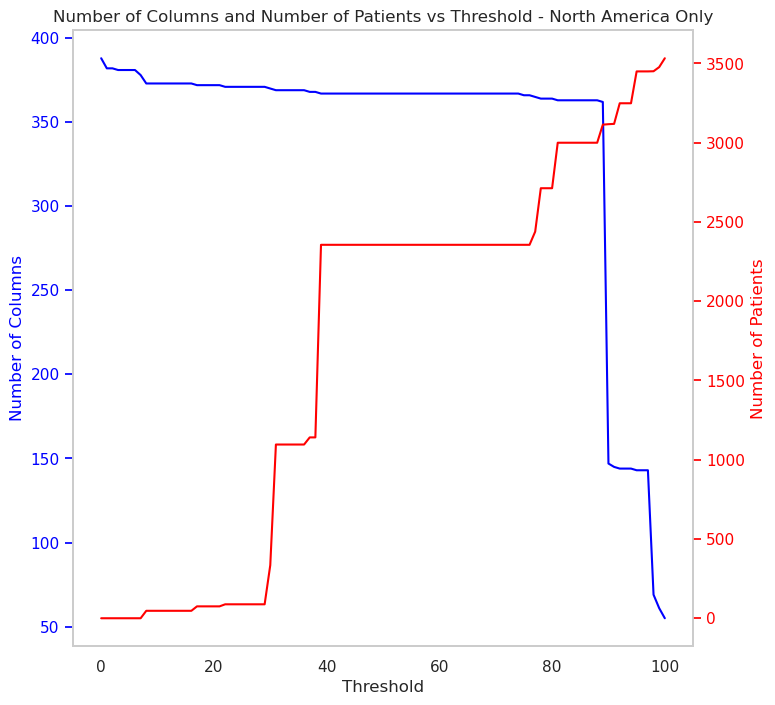

In [46]:
import matplotlib.pyplot as plt

# Extract the data for plotting
x = dfThresNA["threshold"]
y1 = dfThresNA["nCols"]
y2 = dfThresNA["nPatients"]


# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Number of Columns', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second line plot
ax2.plot(x, y2, color='red')
ax2.set_ylabel('Number of Patients', color='red')
ax2.tick_params('y', colors='red')


ax1.grid(False)
ax2.grid(False)
# Add a title and legend
plt.title('Number of Columns and Number of Patients vs Threshold - North America Only')
# plt.legend(['Number of Columns', 'Number of Patients'])

# Display the plot
plt.savefig('OUTPUT/MP/02-splicing/2_2-thresholdsNA.png',dpi=600)
plt.show()

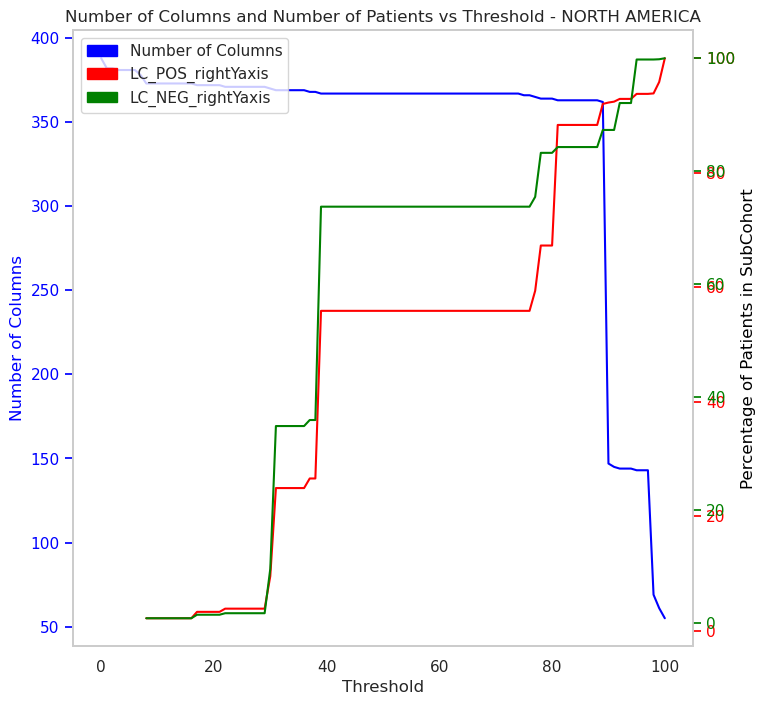

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Extract the data for plotting
x = dfThresNA["threshold"]
y1 = dfThresNA["nCols"]
y2 = dfThresNA["LC_POS_Perc"]
y3 = dfThresNA["LC_NEG_Perc"]

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(x, y1, color="blue", label="num of col")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Number of Columns", color="blue")
ax1.tick_params("y", colors="blue")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second line plot
ax2.plot(x, y2, color="red", label="LC_POS_rightYaxis")
ax2.set_ylabel("Percentage of Patients in SubCohort", color="black")
ax2.tick_params("y", colors="red")

# Create a third y-axis
ax3 = ax1.twinx()

# Plot the third line plot
ax3.plot(x, y3, color="green", label="LC_NEG_rightYaxis")
ax3.tick_params("y", colors="green")

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
# Add a title and legend
plt.title("Number of Columns and Number of Patients vs Threshold - NORTH AMERICA")

# Create a custom legend
blue_patch = mpatches.Patch(color="blue", label="Number of Columns")
red_patch = mpatches.Patch(color="red", label="LC_POS_rightYaxis")
green_patch = mpatches.Patch(color="green", label="LC_NEG_rightYaxis")
plt.legend(handles=[blue_patch, red_patch, green_patch])

# Display the plot
plt.savefig("OUTPUT/MP/02-splicing/2_1-thresholdsAll_subcohort.png", dpi=600)
plt.show()